**Using TF-IDF NLP Technical Analyzing The Significant Feature And Classifying Label In The COVID-19 Fake/Real News Dataset**

# Introduction

During the COVID-19 pandemic period, along with the psychological panic that the new epidemic brought to the population as well as the physical sickness, a large amount of fake news was concocted by some self-media outlets trying to attract traffic, which in turn led to further panic among the population. These fake news stories included, but were not limited to, information about the composition of the virus, the effectiveness of the vaccine, and the mortality rate, among other things. In response to this unforeseen social problem, the early days of the epidemic were dominated by a team of White House advisors, represented by Dr. Fauci, who directly rebutted the fake news through press conferences. This approach proved to be inefficient because the presentation of fake news did not require evidence, whereas debunking the rumors required a complex series of testimonies. This has led, in part, to the government's credibility being called into question. Over time, most public media platforms have introduced their own NLP algorithms to vet users' public domain discoveries, and labeled information about COVID-19 published by non-authoritative media outlets as "potentially misleading" to alert the public to the authenticity of the source.

However, these social media outlets, represented by Twitter (now known as X) and Instagram, do not explicitly label messages that may be Fake News, but instead label all messages related to COVID-19, a move that is likely to make the real messages just as suspect to the public, and make the public unable to derive valid advice from that real information. Therefore, it is necessary to use NLP techniques to categorize news posted by individual users.

In order to achieve this research goal, this study will use Term Frequency - Inverse Document Frequency (TF-IDF) as an NLP feature to carry out the analysis of the experimental texts. There are two benefits of using TF-IDF. Firstly, TF-IDF can emphasizes importtant words, this is because he can reduce the weight of coimmon words that appear frequently. Secondly, TF-IDF can automatic feature extraction, which can convert unstructured data into structured data, which can simplify the difficulty of data preprocessing.

The use of TF-IDF as an NLP feature to classify text content is corroborated in the literature review. In the study of Z Khanam et.al, their team chose to use TF-IDF as an NLP feature after comparing NER, POS and TF-IDF, and the best model was XGBoost.[2] In the study of Patwa, P, et.al, they also chose TF-IDF as an NLP feature.[3] Unlike the Z Khanam's team, their final best model was SVM. however, these previous studies only applied TF-IDF as a Machine Learning Feature and did not parse its linguistic features. Therefore, this study will enhance the analysis of Significant Feature in TF-IDF based on utilizing TF-IDF as a Machine Learning Feature in order to find out the core vocabulary that determines the model judgment.

The specific research question as well as the experimental hypothesis will be elaborated below.

# Research Question And Hypothesis

**Primary Research Question:**

Which specific word terms are informative for predicting class labels?

Hypothesis:

Consider that fake news often requires the use of attention-grabbing adjectives to attract attention, such as huge, devastating or shocking, etc. In contrast, real news tends to use a lot of data or quantitive indicator (such as 'data', 'report' or 'r0') to support a point.

**Secondary Research Question:**

Which model with TF-IDF as the feature has the best prediction accuracy?

Hypothesis:

This question is based on a literature review of several research papers. In the research paper by Z Khanam, et.al, it is argued that xGBoost have a high prediction accuracy. [2] Some other papers, include work from Patwa, P, et.al, have found that other models like SVM, Neural Network, Random Forest and Naive Beyes also have high prediction accuracy.[1] [3] [4] [5]

Based on the results obtained in previous studies, this study will hypothesize that either SVM or xGBoost will have the best performance based on the previous research results.

# Data Preprocessing

## Dataset Background and EDA

Based on the two research questions set and their assumptions, it can be known that the dataset needed for this study should include two base columns, which are the content of the news in the COVID-19 period and the label (fake or real) for this news.

The dataset used in this study is referenced from Kaggle website. (https://www.kaggle.com/datasets/elvinagammed/covid19-fake-news-dataset-nlp?select=Constraint_Train.csv) The original provenance of Dataset comes from a research paper by the team of Patwa, P et.al.[1]

The dataset is splited into two part. The first one is the train set and the second one is test set. The dataset is divided into three columns, which are id, tweet and label, where id is the news id (primary key), tweet is the content of the news and label is the classification of the news (fake or real). Considering that each news item has been labeled, this dataset can be used for this study.

Before start working, we need import all of the required packages and functions.

In [ ]:
import spacy
import pandas as pd
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb

In [ ]:
nlp = spacy.load("en_core_web_sm", exclude=["parser", "ner"])
df_train = pd.read_csv("/content/sample_data/Constraint_Train.csv")
df_test = pd.read_csv("/content/sample_data/english_test_with_labels.csv")
df_train.head(20)

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
5,6,"Covid Act Now found ""on average each person in...",real
6,7,If you tested positive for #COVID19 and have n...,real
7,8,Obama Calls Trump’s Coronavirus Response A Cha...,fake
8,9,"???Clearly, the Obama administration did not l...",fake
9,10,Retraction—Hydroxychloroquine or chloroquine w...,fake


## Number of Variables in Train and Test Dataset

There are 3360 real news and 3060 fakes news in the train set.

<ipython-input-4-edf3fea1164b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df_train, palette='Set2')


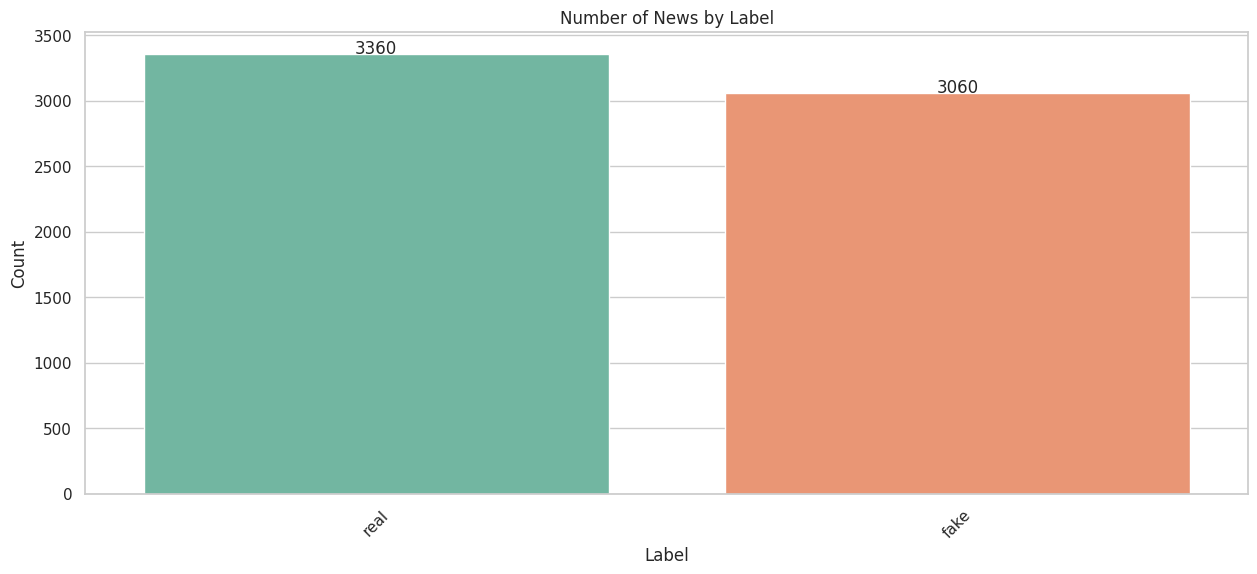

In [ ]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='label', data=df_train, palette='Set2')

plt.title('Number of News by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Get the current tick locations and labels
for p in ax.patches:
    # Get the height of the bar, which represents the count
    height = p.get_height()
    # Place the text on top of each bar, adjusting the position to be centered
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '%d' % int(height), ha='center')

plt.show()

There are 1120 real news and 1020 fake news in the test set

<ipython-input-5-293a6a224b59>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df_test, palette='Set2')


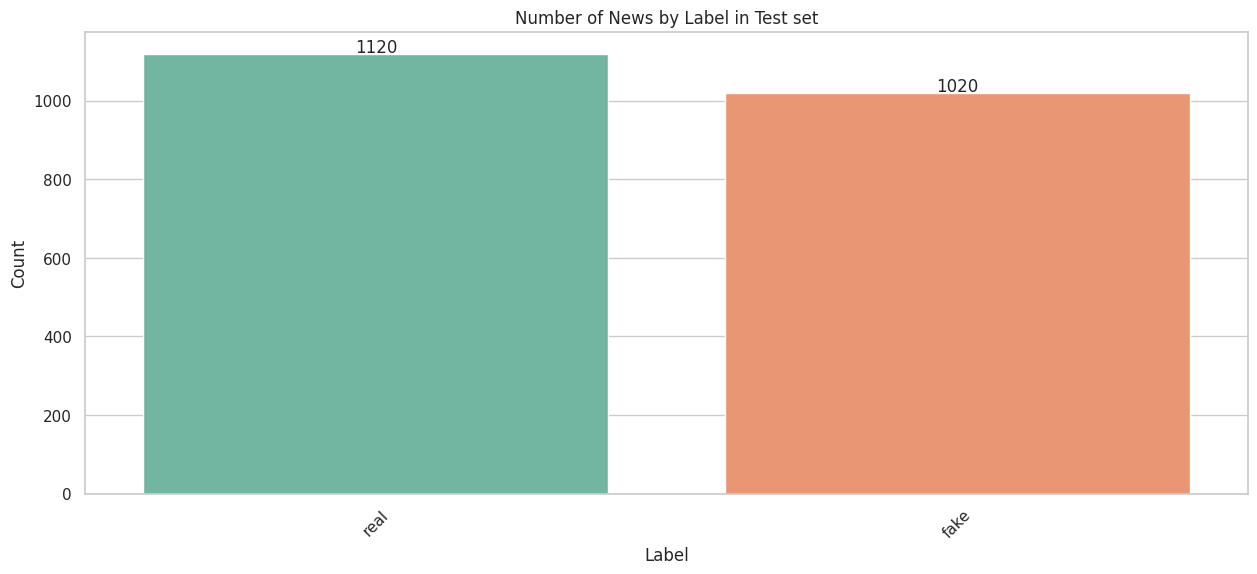

In [ ]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='label', data=df_test, palette='Set2')

plt.title('Number of News by Label in Test set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Get the current tick locations and labels
for p in ax.patches:
    # Get the height of the bar, which represents the count
    height = p.get_height()
    # Place the text on top of each bar, adjusting the position to be centered
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '%d' % int(height), ha='center')

plt.show()

## News Frequent by Length

First of all, let's show the distribution of News by Count for Real News.

<ipython-input-6-f6316cc723c1>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_train_filtered, x='tweet_length', bins=50, kde=True, palette='Set2')


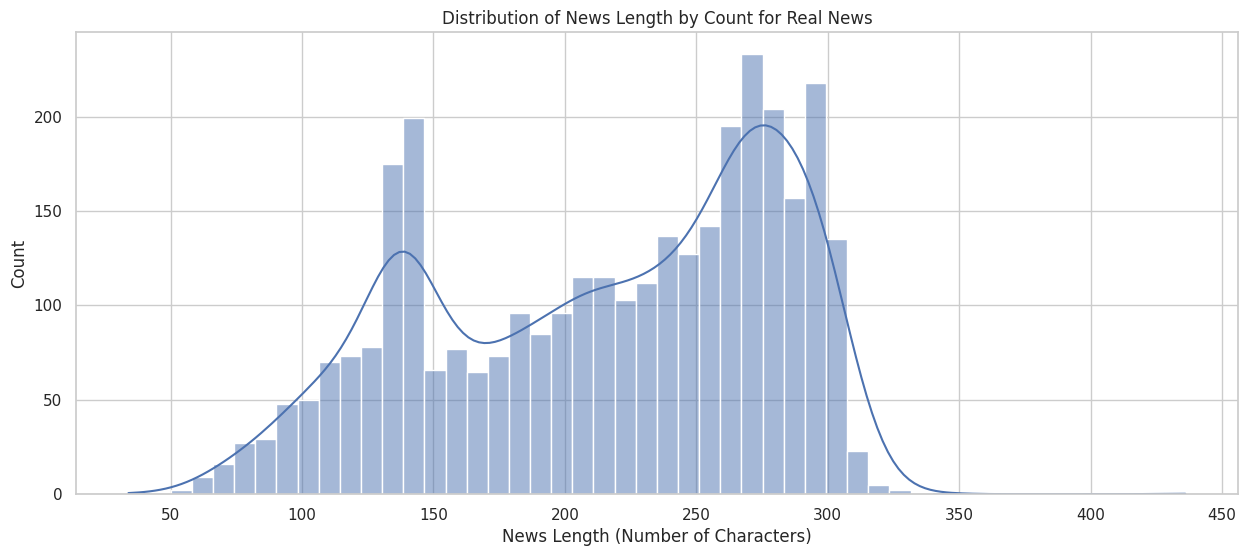

In [ ]:
# Filter out tweets longer than 1000 characters
df_train['tweet_length'] = df_train['tweet'].apply(len)
df_train_filtered = df_train[(df_train['tweet_length'] <= 2000) & (df_train['label'] == 'real')]

# Create the plot for filtered data
plt.figure(figsize=(15, 6))
sns.histplot(data=df_train_filtered, x='tweet_length', bins=50, kde=True, palette='Set2')
plt.title('Distribution of News Length by Count for Real News')
plt.xlabel('News Length (Number of Characters)')
plt.ylabel('Count')
plt.show()

Then, let's show the Distribution of News Length by Count For Fake News

<ipython-input-6-3e9730be2f5a>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_train_filtered, x='tweet_length', bins=50, kde=True, palette='Set2')


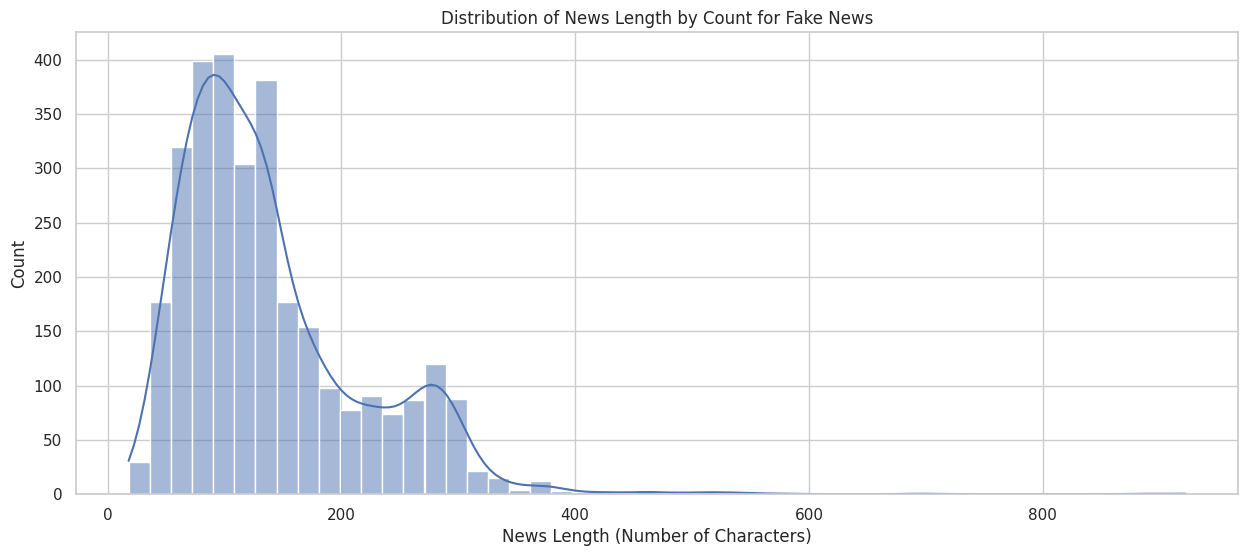

In [ ]:
# Filter out tweets longer than 1000 characters
df_train['tweet_length'] = df_train['tweet'].apply(len)
df_train_filtered = df_train[(df_train['tweet_length'] <= 2000) & (df_train['label'] == 'fake')]

# Create the plot for filtered data
plt.figure(figsize=(15, 6))
sns.histplot(data=df_train_filtered, x='tweet_length', bins=50, kde=True, palette='Set2')
plt.title('Distribution of News Length by Count for Fake News')
plt.xlabel('News Length (Number of Characters)')
plt.ylabel('Count')
plt.show()

According to compare the two distribution plots, we could find that the fake news histogram peaks earlier than the real news, suggesting that fake news articles tend to be shorter in length. The fake news distribution seems to taper off more quickly than the real news distribution, indicating less variability in the length of fake news. Real news lengths might be more varied, with a more gradual decline in frequency as length increases. Finally, both distributions appear to be right-skewed, with a tail extending towards longer article lengths. However, the skew might be more pronounced in the real news distribution.

# TF-IDF Natural Language Processing

After data wrangling, the data will be subjected to natural language processing.As mentioned in the Introduction, this study will use the TF-IDF method to extract the features from the news data. First, the stop word to be eliminated from the data need to be set. These stop words include punctuation marks, spaces, and numeric variables.

In [ ]:
stop_words = STOP_WORDS
def tokenize_docs(doc):
  tokens = [tok.lemma_.lower() for tok in doc if not tok.is_punct and not tok.is_space and not tok.is_digit]
  return [tok for tok in tokens if tok not in stop_words]
train_docs = list(nlp.pipe(df_train["tweet"]))
count_vectorizer = CountVectorizer(tokenizer=tokenize_docs, token_pattern = None, lowercase=False)
X = count_vectorizer.fit_transform(train_docs)

In [ ]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names_out())

,!#coronavirus,"""force","""think",$,+,+1,+10000,+40,-#cancer,--&gt,...,🦟,🧑,🧒,🧔,🧤,🧪,🧫,🧰,🧼,🪟
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


By looking at the dataframe, it can be seen that a total of 16551 special words were filtered out and a total of 6420 news were used to be segmented into train dataset. This sample size is in line with experimental expectations.

In [ ]:
bow_df = pd.DataFrame(X.toarray())
bow_df.columns = count_vectorizer.get_feature_names_out()
# Typically, documents are rows (observations) and columns are terms (features).
# The dataframe is transposed for ease of reading.
bow_df.T

,0,1,2,3,4,5,6,7,8,9,...,6410,6411,6412,6413,6414,6415,6416,6417,6418,6419
!#coronavirus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""force",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""think",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
$,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
🧪,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
🧫,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
🧰,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
🧼,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
num_documents = len(bow_df)

def idf(term):
  documents_containing_term = (bow_df[term] > 0).sum()    # sum of documents containing the term
  return np.log(num_documents/documents_containing_term)  # divide the number of documents by the num documents with the term and get the log.

idf = pd.Series({term:idf(term) for term in bow_df.columns})
idf

!#coronavirus    8.767173
"force           8.767173
"think           8.767173
$                4.778189
+                4.741822
                   ...   
🧪                6.975414
🧫                8.767173
🧰                8.767173
🧼                8.074026
🪟                8.767173
Length: 16551, dtype: float64

In [ ]:
tf_df = bow_df.div(bow_df.sum(axis='columns'), axis='rows') # divide each token count by the total token count for the row.
tf_df

,!#coronavirus,"""force","""think",$,+,+1,+10000,+40,-#cancer,--&gt,...,🦟,🧑,🧒,🧔,🧤,🧪,🧫,🧰,🧼,🪟
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Term Frequency Distribution')

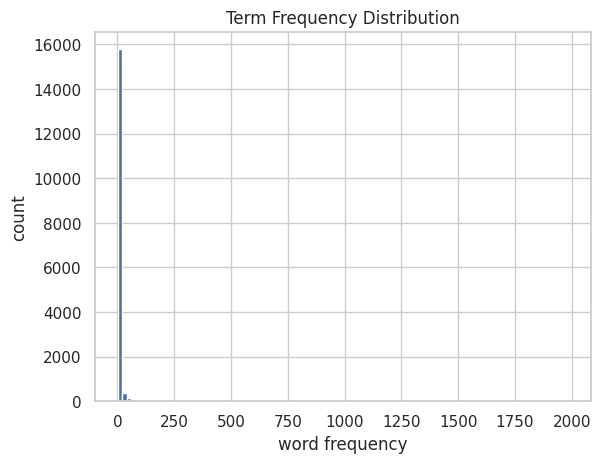

In [ ]:
bow_df.sum().plot.hist(bins=100)
plt.xlabel('word frequency')
plt.ylabel('count')
plt.title('Term Frequency Distribution')

As previously expected, a similarly large number of high-frequency prepositions were present in the data for this study. This resulted in a zipfian distribution of word frequency, and in order to deal with this potential bias, those low-frequency words needed to be removed.

In [ ]:
# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, min_df=5)
# Fit it to the data
X = tfidf_vectorizer.fit_transform(train_docs)
# Output a dataframe
tfidf_df = pd.DataFrame(X.toarray())
tfidf_df.columns = tfidf_vectorizer.get_feature_names_out()
print(f'Dataframe Shape: {tfidf_df.shape}')
tfidf_df

Dataframe Shape: (6420, 2480)


,$,+,-@alexismadrigal,.@realdonaldtrump,08:00,09:30,1.1,1.4,1.5,1.6,...,👉,👍,📍,📢,📺,🔰,🔴,😷,🙏,🧪
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, there are 2480 uniqure words in the bow vector.

# Hyperparameter

The hyperparameter configurations I used here is referenced from sklearn and previous researches. [2] [3] [4]. For example, in Manevitz, M. L., et.al's research, their best model was SVM model with C=10, kernel = linear. [5] This research will build the hyperparameter configurations based those previous researches, but will also add on some extra parameters in the model to find the potential better model.

For Naive Bayes:

The alpha parameter, which is the smoothing parameter, was varied among a few values [0.5, 1.0, 1.5, 2.0]. Smoothing is crucial for text classification to manage the impact of features not present in the learning samples. The choice of values is guided by common defaults and adjustments to explore its sensitivity.

For SVM:

The C parameter, controlling the trade-off between smooth decision boundary and classifying training points correctly, was varied among [0.1, 1, 10]. Smaller values of C increase the margin and smooth the decision boundary, while larger values of C aim to classify more training examples correctly.
The kernel parameter was explored with ['linear', 'rbf'] options, where linear is suitable for linearly separable data, and rbf is chosen for non-linear data. The linear kernel is particularly relevant to high-dimensional text data.

For Random Forest:

Parameters like max_depth [5, 10, None] and n_estimators [100, 200] were chosen. max_depth controls the depth of the trees, and n_estimators is the number of trees in the forest. These are adjusted to balance model complexity and overfitting risks.

For Neural Network:

The architecture was varied slightly with hidden_layer_sizes of [(50,), (100,)] and activation functions ['tanh', 'relu']. These choices reflect a basic exploration into network depth and activation functions to understand their impact on the model's ability to capture non-linear patterns.

For XGBoost:

The parameters list used to train this model are 'n_estimators': [100, 500],'learning_rate': [0.01, 0.1],'max_depth': [5],'colsample_bytree': [0.7], 'subsample': [1].

In [ ]:
seed = 42 # set random seed
ylabels = df_train['label']
X_test = df_test['tweet']
# the labels, or answers, we want to test against
X_train, X_valid, y_train, y_valid = train_test_split(df_train['tweet'], ylabels, test_size=0.2, random_state = seed)
y_test = df_test['label']
X_train = list(nlp.pipe(X_train))
X_test = list(nlp.pipe(X_test))
X_valid = list(nlp.pipe(X_valid))
X_train_str = [doc.text for doc in X_train]
X_test_str = [doc.text for doc in X_test]
X_valid_str = [doc.text for doc in X_valid]
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_str)
X_test_tfidf = tfidf_vectorizer.transform(X_test_str)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid_str)

In [ ]:
param_grids = {
    'Naive Bayes': {
        'classifier__alpha': [0.5, 1.0, 1.5, 2.0]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10, None]
    },
    'Neural Network': {
        'classifier__hidden_layer_sizes': [(50,), (100,)],
        'classifier__activation': ['tanh', 'relu']
    },
}
classifiers = [
    ('Naive Bayes', MultinomialNB()),
    ('SVM', SVC(probability=True)),
    ('Random Forest', RandomForestClassifier()),
    ('Neural Network', MLPClassifier(max_iter=1000)),
]
# Vectorize text data outside the loop to avoid repeating the same operation
f1_scores_dict = {name: None for name, _ in classifiers}
for name, classifier in classifiers:
    pipeline = Pipeline([
        ('classifier', classifier),
    ])

    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', verbose=2)

    grid_search.fit(X_train_tfidf, y_train)

    print(f"Best parameters for {name}: {grid_search.best_params_}")

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_tfidf)
    y_valid_pred = best_model.predict(X_valid_tfidf)

    print(name)
    print(classification_report(y_test, y_pred))

    valid_f1_score = f1_score(y_valid, y_valid_pred, average='macro')
    test_f1_score = f1_score(y_test, y_pred, average='macro')

    f1_scores_dict[name] = {
        'Validation F1 Score': valid_f1_score,
        'Test F1 Score': test_f1_score
    }
for model_name, scores in f1_scores_dict.items():
    print(f"{model_name} - Validation F1 Score: {scores['Validation F1 Score']:.4f}, "
          f"Test F1 Score: {scores['Test F1 Score']:.4f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................classifier__alpha=0.5; total time=   0.0s
[CV] END ..............................classifier__alpha=0.5; total time=   0.1s
[CV] END ..............................classifier__alpha=0.5; total time=   0.1s
[CV] END ..............................classifier__alpha=0.5; total time=   0.1s
[CV] END ..............................classifier__alpha=0.5; total time=   0.0s
[CV] END ..............................classifier__alpha=1.0; total time=   0.0s
[CV] END ..............................classifier__alpha=1.0; total time=   0.0s
[CV] END ..............................classifier__alpha=1.0; total time=   0.0s
[CV] END ..............................classifier__alpha=1.0; total time=   0.0s
[CV] END ..............................classifier__alpha=1.0; total time=   0.1s
[CV] END ..............................classifier__alpha=1.5; total time=   0.0s
[CV] END ..............................classifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_valid_encoded = label_encoder.fit_transform(y_valid)
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5],
    'colsample_bytree': [0.7],
    'subsample': [1]
}

# Setup GridSearchCV for XGBoost specifically
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid, cv=5, scoring='f1_macro', verbose=2)

# Use the encoded labels for fitting XGBoost
xgb_grid_search.fit(X_train_tfidf, y_encoded)
print(f"Best parameters for {name}: {xgb_grid_search.best_params_}")

best_model = xgb_grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
y_valid_pred = best_model.predict(X_valid_tfidf)

print(name)
print(classification_report(y_test_encoded, y_pred))

valid_f1_score = f1_score(y_valid_encoded, y_valid_pred, average='macro')
test_f1_score = f1_score(y_test_encoded, y_pred, average='macro')

f1_scores_dict[name] = {
    'Validation F1 Score': valid_f1_score,
    'Test F1 Score': test_f1_score
}
print(f"XGBoost - Validation F1 Score: {valid_f1_score:.4f}, "
          f"Test F1 Score: {test_f1_score:.4f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   9.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   6.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   5.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   8.7s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   5.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1; total time=  22.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1; total time=  23.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1; total time=  22.1s
[CV] END colsample_bytree=0.

# Result Discussion

## Primary Research Question Result

In the hyperparameter step, the best model derived is the SVM model with C=1, kernel=linear. The result discussion about this model will be discussed in detail in Secondary Result.

In [ ]:
pipeline_best_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC(C=1, kernel='linear', probability=True))
])
pipeline_best_svm.fit(X_train_str, y_train)
y_pred_svm = pipeline_best_svm.predict(X_test_str)

First, the SVM model coefficient after sort is extracted and the TOP 30 important features are printed.

In [ ]:
# Extract feature names
feature_names = pipeline_best_svm.named_steps['tfidf'].get_feature_names_out()

# Extract coefficients from the SVM model

svm_coef = pipeline_best_svm.named_steps['classifier'].coef_.toarray()

# Create a list of (feature name, coefficient) tuples
features_coef = list(zip(feature_names, svm_coef[0]))

# Sort the features by the absolute value of their coefficient
# This indicates how influential a word is in determining the class
sorted_features = sorted(features_coef, key=lambda x: abs(x[1]), reverse=True)

# Display the top 30 features
print("Top 30 most important features:")
for feature, coef in sorted_features[:30]:
    print(f"{feature}: {coef:>10.3f}")

Top 100 most important features:
rt:      4.428
co:      3.798
coronavirus:     -3.721
https:      3.697
news:     -3.349
trump:     -2.785
alexismadrigal:      2.740
19:     -2.718
covid19:      2.606
restrictions:      2.344
drtedros:      2.331
coronavirusfacts:     -2.328
amp:      2.204
corona:     -2.183
indiafightscorona:      1.905
states:      1.883
realdonaldtrump:     -1.880
today:      1.832
testing:      1.744
factcheck:     -1.691
data:      1.671
virus:     -1.642
report:      1.608
contact:      1.571
nz:      1.570
via:      1.559
level:      1.508
tested:      1.478
have:      1.464
england:      1.428


Next, check the frequency of the top 30 words in real and fake.

In [ ]:
specific_words = [
    "rt", "co", "coronavirus", "https", "news", "trump", "alexismadrigal",
    "19", "covid19", "restrictions", "drtedros", "coronavirusfacts", "amp",
    "corona", "indiafightscorona", "states", "realdonaldtrump", "today",
    "testing", "factcheck", "data", "virus", "report", "contact", "nz",
    "via", "level", "tested", "have", "england"
]
from collections import Counter
import re

def preprocess_text(text):
    # Convert text to lowercase, remove punctuation, and split into words
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    words = text.split()
    return words

# Count words in fake news
fake_words = []
for text in fake_news:
    fake_words.extend(preprocess_text(text))
fake_word_counts = Counter(fake_words)

# Count words in real news
real_words = []
for text in real_news:
    real_words.extend(preprocess_text(text))
real_word_counts = Counter(real_words)
print("Word frequencies in fake news:")
for word in specific_words:
    print(f"{word}: {fake_word_counts[word]}")

print("\nWord frequencies in real news:")
for word in specific_words:
    print(f"{word}: {real_word_counts[word]}")

Word frequencies in fake news:
rt: 19
co: 1255
coronavirus: 1323
https: 1254
news: 139
trump: 254
alexismadrigal: 0
19: 1036
covid19: 207
restrictions: 14
drtedros: 0
coronavirusfacts: 53
amp: 56
corona: 125
indiafightscorona: 3
states: 65
realdonaldtrump: 21
today: 38
testing: 65
factcheck: 26
data: 23
virus: 235
report: 30
contact: 8
nz: 1
via: 14
level: 6
tested: 61
have: 272
england: 0

Word frequencies in real news:
rt: 254
co: 3144
coronavirus: 338
https: 3142
news: 36
trump: 4
alexismadrigal: 47
19: 773
covid19: 1286
restrictions: 68
drtedros: 110
coronavirusfacts: 0
amp: 424
corona: 20
indiafightscorona: 317
states: 549
realdonaldtrump: 0
today: 380
testing: 402
factcheck: 0
data: 252
virus: 80
report: 304
contact: 92
nz: 36
via: 85
level: 111
tested: 205
have: 778
england: 43


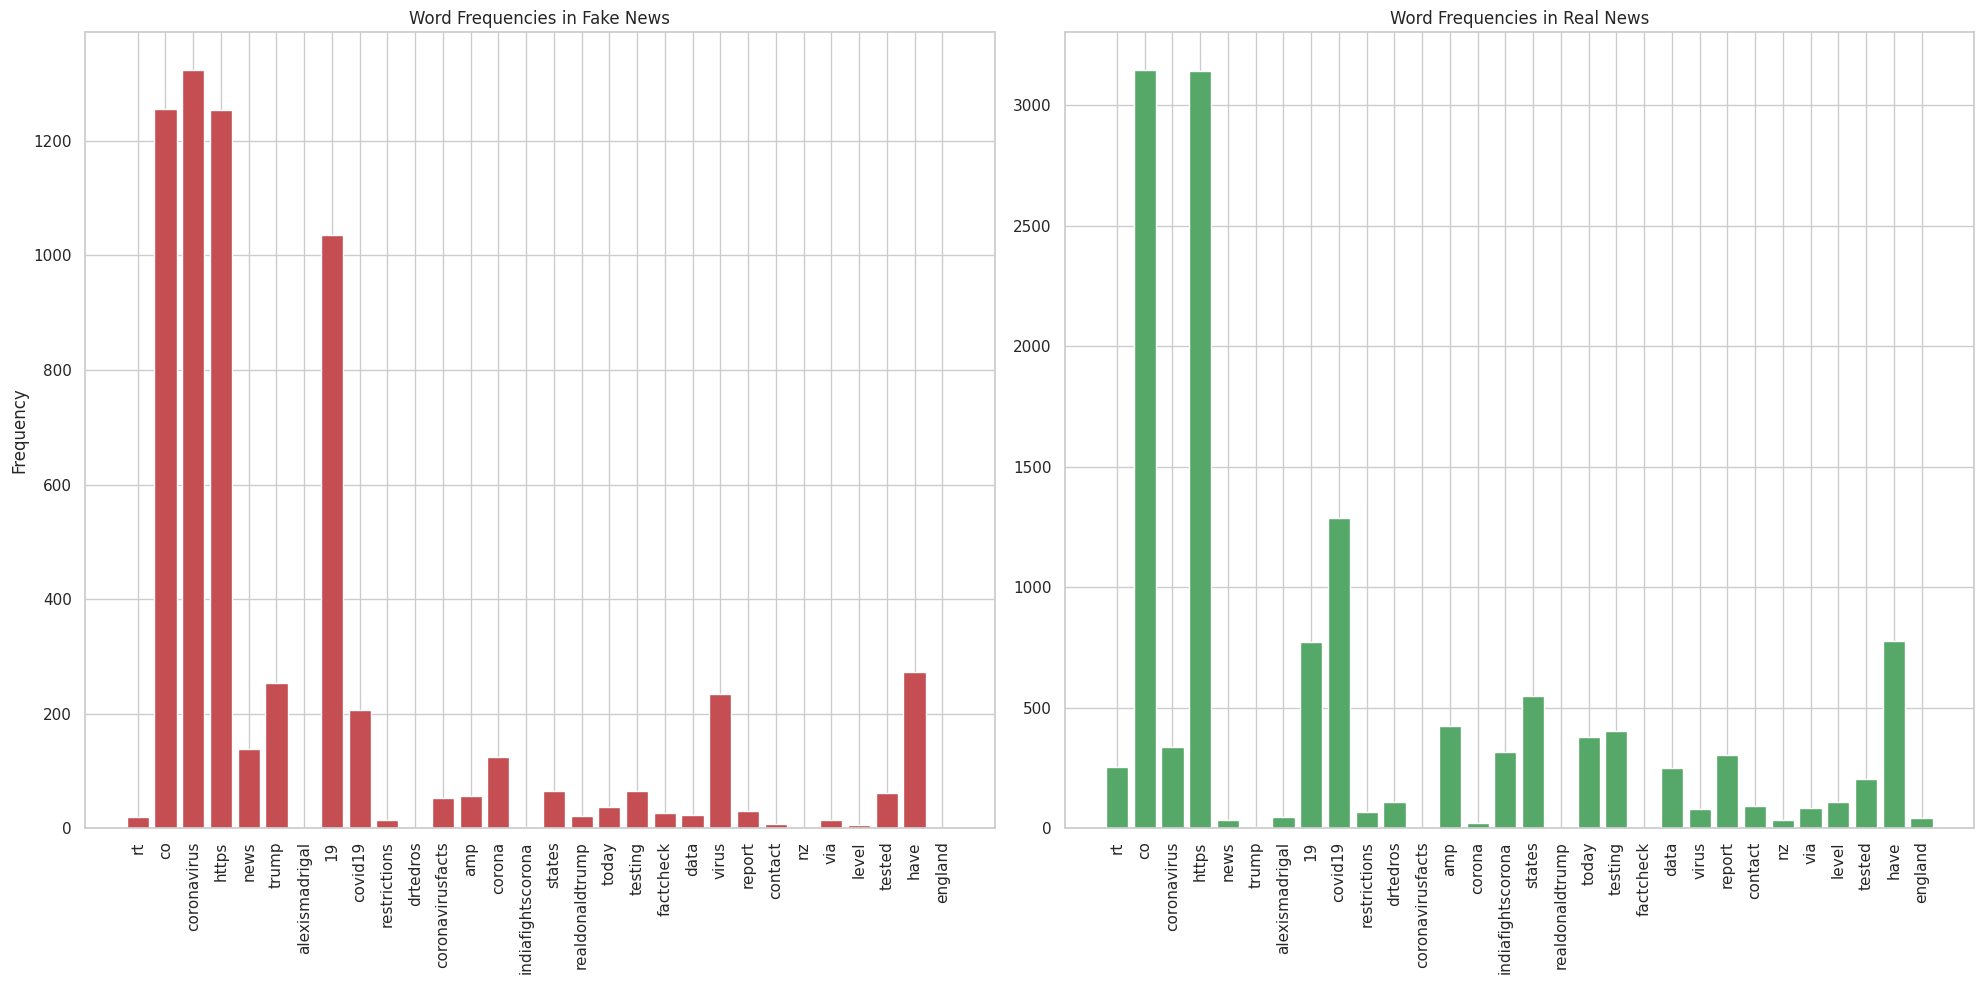

In [ ]:
fake_frequencies = [fake_word_counts[word] for word in specific_words]
real_frequencies = [real_word_counts[word] for word in specific_words]

# Set up plot size
plt.figure(figsize=(20, 10))

# Set up indices for X-axis
indices = np.arange(len(specific_words))

# Plot for fake news
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(indices, fake_frequencies, color='r')
plt.title('Word Frequencies in Fake News')
plt.ylabel('Frequency')
plt.xticks(indices, specific_words, rotation='vertical')
plt.tight_layout()

# Plot for real news
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(indices, real_frequencies, color='g')
plt.title('Word Frequencies in Real News')
plt.xticks(indices, specific_words, rotation='vertical')
plt.tight_layout()

# Show plot
plt.show()

According to the Top 30 word Frequencies in Fake/ Real news plot, the following three points can be summarized.

**1.High-Frequency Terms Common to Both Categories:**

Terms like "coronavirus," "covid19," and "https" are top frequencies in both fake and real news, highlighting their general relevance to the COVID-19 topic rather than their utility in differentiating fake from real news.

**2.Distinguishing Features in Fake News:**

The term "trump" shows a higher frequency in fake news compared to real news, possibly reflecting a focus on political figures within fake news narratives.

Furthermore, we could find that the absence of significant use of proposed sensational adjectives in the top words. However, the prominence of certain terms might reflect narrative framing differences.

**3.Distinguishing Features in Real News:**

The presence of terms like "testing," "data," "report," and "contact" in higher frequencies in real news supports the hypothesis that real news is more likely to focus on factual reporting and specific details related to public health measures.

"indiafightscorona" and "drtedros" appear significantly in real news, underscoring the reliance on authoritative sources and specific public health campaigns or figures, aligning with the expectation that real news often cites authoritative sources.

## Secondary Research Question Result

Model Performances Based on Grid Search Output:

Naive Bayes had an accuracy of 0.91, with the best alpha parameter being 0.5. This model showed a strong balance between precision and recall, demonstrating its effectiveness in text classification tasks with TF-IDF features.

SVM achieved an accuracy of 0.94 with the best parameters being C=1 and kernel='linear'. SVM's high performance indicates its robustness in handling high-dimensional spaces typical of TF-IDF vectorized text data.

Random Forest reported an accuracy of 0.91 with the best parameters as max_depth=None and n_estimators=200. This ensemble method showcased solid performance, benefiting from the diversified decision trees to manage the complex feature space created by TF-IDF.

Neural Network obtained an accuracy of 0.94 with the best setup being activation='tanh' and hidden_layer_sizes=(50,). This indicates the model's capacity to capture complex patterns in the TF-IDF transformed text through its layers.

XGBoost presented an accuracy of 0.93 with the best parameters being colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1. This performance underscores XGBoost's efficiency in sequential improvement based on previous errors, even with the structured format of TF-IDF vectors.



By comparing the F1 Score of the five models, Neural Network and SVM are the best models with similar Validation set F1 Score and Test F1 Score. However, in hyperparameter tuning and model selection, the F1 Score of the validation set is more important because it better reflects the performance of the different models in the training phase.Therefore, considering that the validation F1 Score of the SVM model is slightly higher than that of Neural Network (0.931 vs. 0.929), this study concludes that the SVM model is the best model for predicting the COVID-19 Fake/Real News Dataset under the current condition. This result still needs to be further confirmed by interpreting the confusion matrix.

              precision    recall  f1-score   support

        fake       0.94      0.92      0.93      1020
        real       0.93      0.95      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.93      0.93      2140
weighted avg       0.94      0.94      0.93      2140



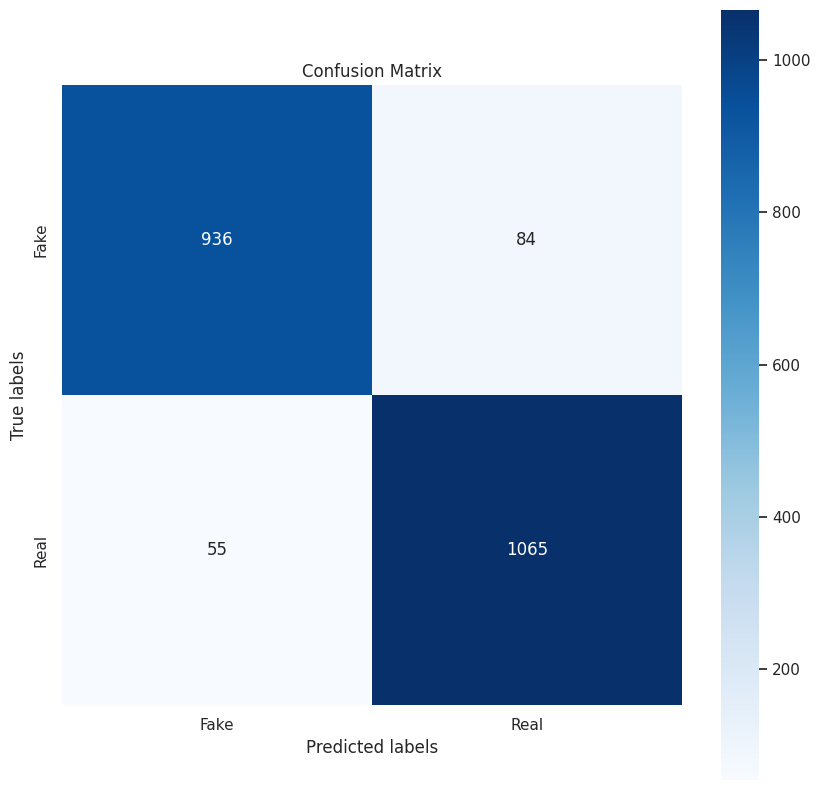

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print(classification_report(y_test, y_pred_svm))
# Optional: Use seaborn for a nicer-looking plot
sns.set()

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap="Blues", square=True)

# Setting labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
# Set tick labels to match the categories
ax.xaxis.set_ticklabels(['Fake', 'Real'])
ax.yaxis.set_ticklabels(['Fake', 'Real'])

plt.show()

The top-left quadrant (936) represents the true positives, where the model correctly identified fake news.

The bottom-right quadrant (1065) represents the true negatives, where the model correctly identified real news.

The top-right quadrant (84) represents the false negatives, where the model incorrectly labeled real news as fake.

The bottom-left quadrant (55) represents the false positives, where the model incorrectly labeled fake news as real.

Based on the confusion matrix, the model shows a high number of true positives and true negatives, indicating strong predictive performance. It also shows relatively low numbers for both false positives and false negatives, suggesting good balance and precision.

Therefore, there is sufficient evidence to indicate that SVM model is the best model for predicting the given COVID-19 Fake/Real News Dataset.

# Conclusion

First of all, for the primary research question, the result lends partial support to the hypothesis. While there wasn't a clear indication of the use of sensational adjectives in fake news within the top words analyzed, real news demonstrated a tendency towards data-centric and authoritative reporting. This suggests that while sensationalism might not be as straightforwardly quantified through the presence of specific adjectives, the thematic focus and reliance on authoritative sources and factual information can be indicative of news authenticity.

Second, for the secondary research question,  considering all the evidence from the grid search outputs, the SVM model stands out as the most accurate for classifying COVID-19 related fake and real news when using TF-IDF as the feature extraction method. Its performance, as quantified by the F1 score and other metrics, demonstrates its
reliability in this specific text classification task. This conclusion is consistent with that reached by the team of Manevitz, L et.al, thus pointing out that the hypothesis is correct.

# Reference List:

[1] Khanam, Z., Alwasel, B. N., Sirafi, H., & Rashid, M. (2021). Fake News Detection Using Machine Learning Approaches. IOP Conference Series: Materials Science and Engineering, 1099, 012040. International Conference on Applied Scientific Computational Intelligence using Data Science (ASCI 2020), 22nd-23rd December 2020, Jaipur, India. Retrieved from https://doi.org/10.1088/1757-899X/1099/1/012040

[2] Patwa, P., Sharma, S., PYKL, S., Guptha, V., Kumari, G., Akhtar, M. S., Ekbal, A., Das, A., & Chakraborty, T. (n.d.). Fighting an Infodemic: COVID-19 Fake News Dataset. IIIT Sri City, India; IIIT Delhi, India; IIT Patna, India; Wipro Research, India. Retrieved from https://arxiv.org/ftp/arxiv/papers/2011/2011.03327.pdf

[3] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

[4] Aninditya, A., Hasibuan, M. A., & Sutoyo, E. (Year). Text mining approach using TF-IDF and Naive Bayes for classification of exam questions based on cognitive level of Bloom's taxonomy. Department of Information Systems, Telkom University.

[5] Manevitz, L. M., & Yousef, M. (2001). One-class SVMs for document classification. Department of Computer Science, University of Haifa. Haifa 31905, Israel.

In [ ]:
# %%capture
from google.colab import drive
drive.mount('/content/drive')
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/drive/MyDrive/Colab\ Notebooks/yang_assignment2.ipynb

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra texlive-latex-recommended
  texlive-pictures tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-